# Topic Modeling aus den Interviews mit LDA 
Masterarbeit 
Verena Lemberger


Teile aus folgenden Repositories übernommen: 
https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Introduction%20to%20Topic%20Modeling.ipynb
https://github.com/chawlasahaj/dsiprojects/blob/main/NLP-classification/code/P3%20(Bonus)%20Sentiment%20Analysis%20and%20Topic%20Modelling%20Visualization.ipynb
https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/



# Importieren der Libraries 


In [4]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
import glob
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.ERROR)



# Importieren der Interviewdaten 

In [5]:
#import glob
#files = glob.glob("transcripts/Interview*.xlsx")
#df = pd.DataFrame()
#for file in files:
#     if file.endswith('.xlsx'):
#         df = df.append(pd.read_excel(file), ignore_index=True) 
#df.head()
#df.describe()
#interview1 = pd.read_excel("transcripts/Interview_1_transcript.xlsx")
#interview2 = pd.read_excel("transcripts/Interview_2_transcript.xlsx")
#interview3 = pd.read_excel("transcripts/Interview_3_transcript.xlsx")
#interview4 = pd.read_excel("transcripts/Interview_4_transcript.xlsx")
#interview5 = pd.read_excel("transcripts/Interview_5_transcript.xlsx")
#interview6 = pd.read_excel("transcripts/Interview_6_transcript.xlsx")
#interview7 = pd.read_excel("transcripts/Interview_7_transcript.xlsx")
#interview8 = pd.read_excel("transcripts/Interview_8_transcript.xlsx")
#interview9 = pd.read_excel("transcripts/Interview_9_transcript.xlsx")
#interview10 = pd.read_excel("transcripts/Interview_10_transcript.xlsx")
#df.columns = ["id", "interview1", "interview2", "interview3", "interview4", "interview5", "interview6", "interview7", "interview8", "interview9", "interview10"]

df = pd.read_excel("transcripts/transcripts_joined.xlsx")
df.columns = ["id", "text"]
df.head()


,id,text
0,2,"2: Vielen Dank auf jeden Fall, dass du dir die..."
1,3,2: Aufzeichnung ist noch ausstehend sie schon ...
2,4,"2: Danke, XY, dass du dir die Zeit genommen ha..."
3,5,"2: Dank dafür, dass Sie sich Zeit genommen hab..."
4,6,2: Wie haben sie geplant zu transkribieren?| s...


In [6]:
from nltk.corpus import stopwords

stopwords = stopwords.words("german")

#my_stopwords = [unicode(x.strip(), 'utf-8') for x in open('stopwords_german.txt','r').read().split('\n')]
stopwords.extend(["ja", "sec", "einfach", "start", "end", "schon", "mal", "halt", "vielleicht", "immer", "ganz", "sagen", "irgendwie", "eben", "lemberger", "mehr", "gibt", "wirklich", "glaube", "natürlich", "viele", "frage", "geht", "gut", "heißt", "bisschen", "thema", "eigentlich", "macht", "wäre", "gar", "dafür", "gehen", "sehen", "gesagt", "kommt", "gerade", "dinge", "genau", "finde", "ganze", "tun", "sage", "weiß", "sogar", "veronika", "kriegen", "eher"]) 

print(stopwords)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc


# Visualisierung der Daten zur weiteren Bereinigung


In [7]:
def get_top_words(corpus, n=None):
    cvec = CountVectorizer(stop_words = stopwords).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [8]:
common_words = get_top_words(df["text"], 20)
for word, freq in common_words:
    print(word, freq)

zeit 90
menschen 87
unternehmen 83
leute 77
wichtig 54
müssen 52
selber 51
gesellschaft 49
digitalisierung 44
technologie 44
nutzen 43
geben 43
mensch 42
jahren 40
bereich 40
arbeitsmarkt 39
gleich 36
weniger 36
zukunft 36
wissen 36


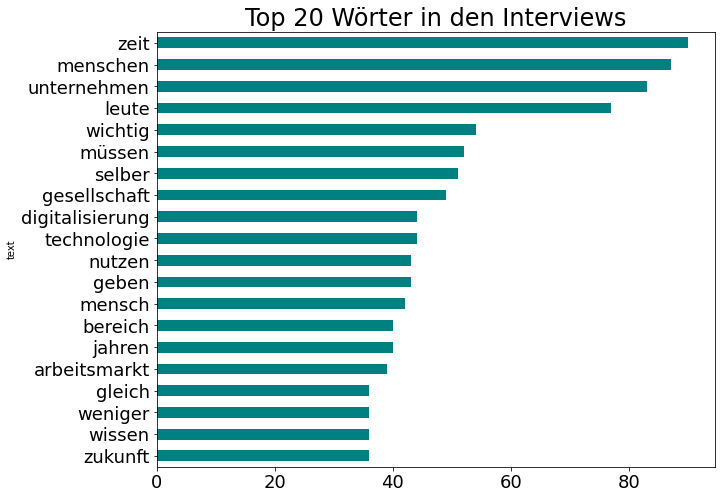

In [9]:
# Top 20 Words in Interviews ohne Stopwords einfach  
df_titles = pd.DataFrame(common_words, columns=["text", "count"])
plt.figure(figsize=(10,8))
df_titles.groupby("text").sum()["count"].sort_values(ascending=True).plot(kind='barh', fontsize=18, color="teal")
plt.title("Top 20 Wörter in den Interviews", fontsize=24);

# Bereinigung der Daten 


In [160]:
#df = df.drop(columns=["id"])
#df.head()

In [13]:
# Remove punctuation
df["text"] = \
df["text"].map(lambda x: re.sub("[,\.!?:123456789]", "", x))

# Convert the texts to lowercase
df["text"] = \
df["text"].map(lambda x: x.lower())

#Tokenize data
data = df.text.values.tolist()
dft = gensim.utils.simple_preprocess(str(data), deacc=True)
print(dft)

['vielen', 'dank', 'auf', 'jeden', 'fall', 'dass', 'du', 'dir', 'die', 'zeit', 'genommen', 'hast', 'ich', 'wurde', 'auch', 'ganz', 'gleich', 'mit', 'dem', 'thema', 'arbeitsmarkt', 'generell', 'vor', 'allem', 'in', 'bezug', 'auf', 'tirol', 'starten', 'wo', 'ich', 'mal', 'mit', 'dem', 'der', 'frage', 'starten', 'wurde', 'wie', 'hat', 'sich', 'der', 'arbeitsmarkt', 'bei', 'uns', 'verandert', 'und', 'was', 'siehst', 'du', 'vor', 'allem', 'in', 'hinblick', 'auf', 'die', 'digitalisierung', 'fur', 'veranderungen', 'kommen', 'start', 'sec', 'end', 'sec', 'also', 'generell', 'sag', 'ich', 'mal', 'wie', 'hat', 'sich', 'der', 'arbeitsmarkt', 'generell', 'einfach', 'verandert', 'das', 'muss', 'man', 'jetzt', 'eigentlich', 'sagen', 'wie', 'war', 'es', 'vor', 'corona', 'vor', 'etwas', 'einem', 'jahr', 'da', 'war', 'ja', 'eine', 'unglaubliche', 'suche', 'einfach', 'auch', 'nach', 'talenten', 'bei', 'allen', 'unternehmern', 'und', 'das', 'hat', 'sich', 'sicher', 'reduziert', 'also', 'da', 'ist', 'jetz

In [18]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(dft, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[dft], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download de_core_news_sm  # run in terminal once
def process_words(texts, stop_words=stopwords, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("de_core_news_sm")
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(dft)  
print(data_ready)

[]


In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
# Create Corpus with Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]


# LDA Model 



In [20]:
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="symmetric",
                                           iterations=100,
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

ValueError: cannot compute LDA over an empty collection (no terms)


# Visualisierungen

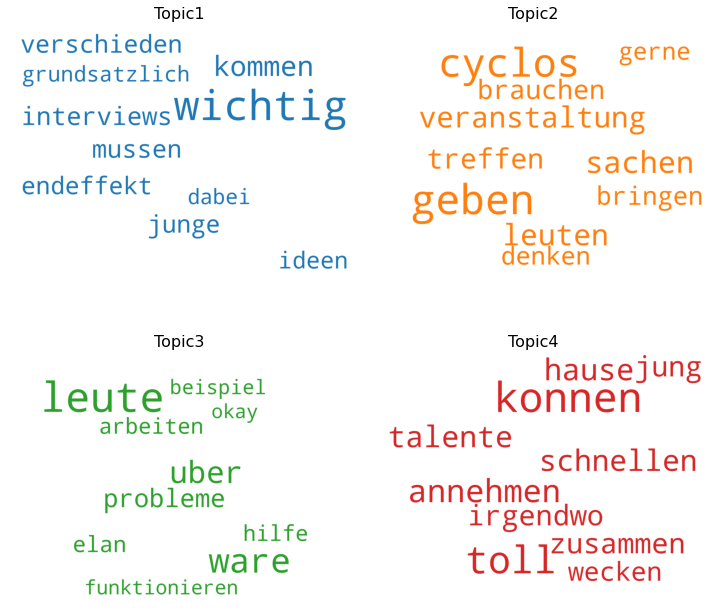

In [17]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stopwords,
                  background_color="white",
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap="tab10",
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title("Topic" + str(i + 1), fontdict=dict(size=16))
    plt.gca().axis("off")
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

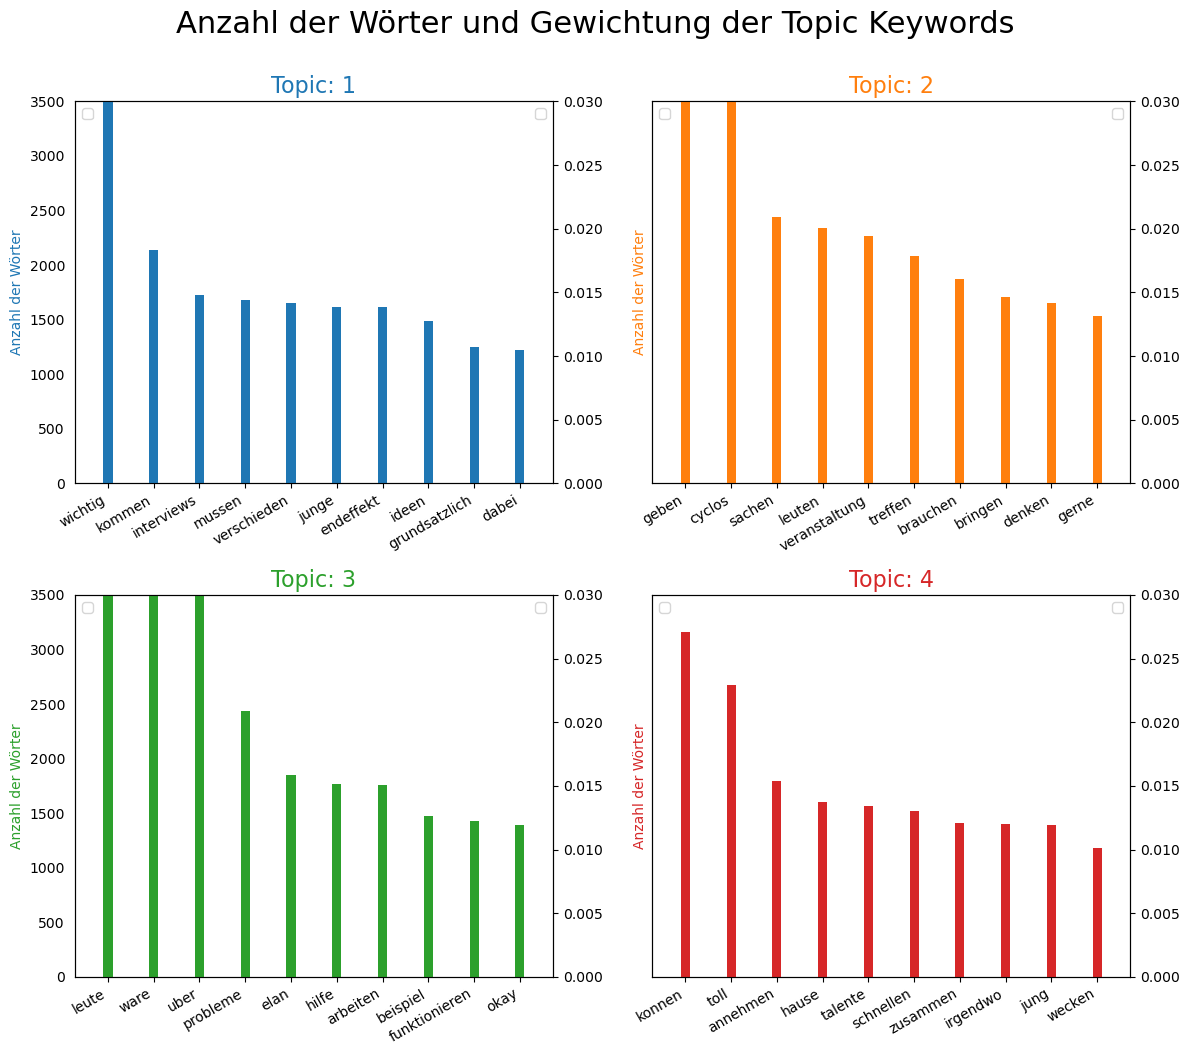

In [166]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in dft for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=["Wort", "topic_id", "Gewichtung", "Anzahl Wörter"])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(12,10), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x="Wort", height="Anzahl Wörter", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3)
    ax_twin = ax.twinx()
    ax_twin.bar(x="Wort", height="Gewichtung", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2)
    ax.set_ylabel("Anzahl der Wörter", color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title("Topic: " + str(i + 1), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, "Wort"], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle("Anzahl der Wörter und Gewichtung der Topic Keywords", fontsize=22, y=1.05)    
plt.show()

In [167]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.044017  0.100267       1        1  30.498335
3     -0.029809  0.185274       2        1  24.616951
2     -0.178746 -0.190244       3        1  22.536608
1      0.252572 -0.095296       4        1  22.348106, topic_info=              Term        Freq       Total Category  logprob  loglift
77           leute  181.000000  181.000000  Default  30.0000  30.0000
634        wichtig  206.000000  206.000000  Default  29.0000  29.0000
93           geben  126.000000  126.000000  Default  28.0000  28.0000
143           ware  118.000000  118.000000  Default  27.0000  27.0000
3808        cyclos  115.000000  115.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
98    gesellschaft   18.346841   19.025669   Topic4  -5.0757   1.4621
5         generell   18.355502   19.040926   Topic4  -5.0752   1.4618
371       angebote   17.940722   18.628943   Topic4  -5.0981   1.4608
1756   fokussieren   23.056811   23.942568   Topic4  -4.8472   1.4607
1412        jugend   18.963929   19.954975   Topic4  -5.0426   1.4475

[172 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
110       4  0.977039         alt
371       4  0.966238    angebote
948       2  0.990681    annehmen
96        1  0.968895  ansprechen
567       1  0.990376      arbeit
...     ...       ...         ...
466       3  0.981144      wissen
1         3  0.991256        zeit
519       3  0.965843  zeitbanken
127       1  0.989370     zukunft
441       2  0.978445    zusammen

[166 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

# LDA with Sckit Learn 

In [21]:

dfsk = pd.read_excel("transcripts/transcripts_joined.xlsx")
dfsk.columns = ["id", "text"]
dfsk.head()

# Remove punctuation
dfsk["text"] = \
dfsk["text"].map(lambda x: re.sub("[,\.!?:123456789]", "", x))

# Convert the texts to lowercase
dfsk["text"] = \
dfsk["text"].map(lambda x: x.lower())

In [22]:
# LDA with Sckit Learn 
from sklearn.feature_extraction.text import CountVectorizer 
count = CountVectorizer(stop_words = stopwords,
                       max_df = .3, 
                       max_features = 5000)
data_ready_sk = count.fit_transform(dfsk["text"].values)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 6,
                               random_state = 123, 
                               learning_method="batch")
# fitting LDA
topics_sk = lda.fit_transform(data_ready_sk)

# access components to extract matrix 
lda.components_.shape


(6, 4550)

In [23]:
# Top 10 words for 6 topics 
n_top_words = 6
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d: " % (topic_idx + 1))
    print (" ".join([feature_names[i]
                    for i in topic.argsort() \
                     [:-n_top_words - 1:-1]]))
    

Topic 1: 
endeffekt cyclos talente talentenetz angeht ideen
Topic 2: 
enorm uber faktor virtuell holen shared
Topic 3: 
kastel automatisierten nett aufpassen not verwaltet
Topic 4: 
arbeitswelt manchmal bayern mitarbeitenden studie mindset
Topic 5: 
präsenz kreditsystem immens einheiten euros minus
Topic 6: 
tauschkreise teilnehmer projekt ersetzen ziehen anscheinend


In [24]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 600
n_features = 1000
n_components = 6
n_top_words = 10


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 20})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)
        color = ["teal"]

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


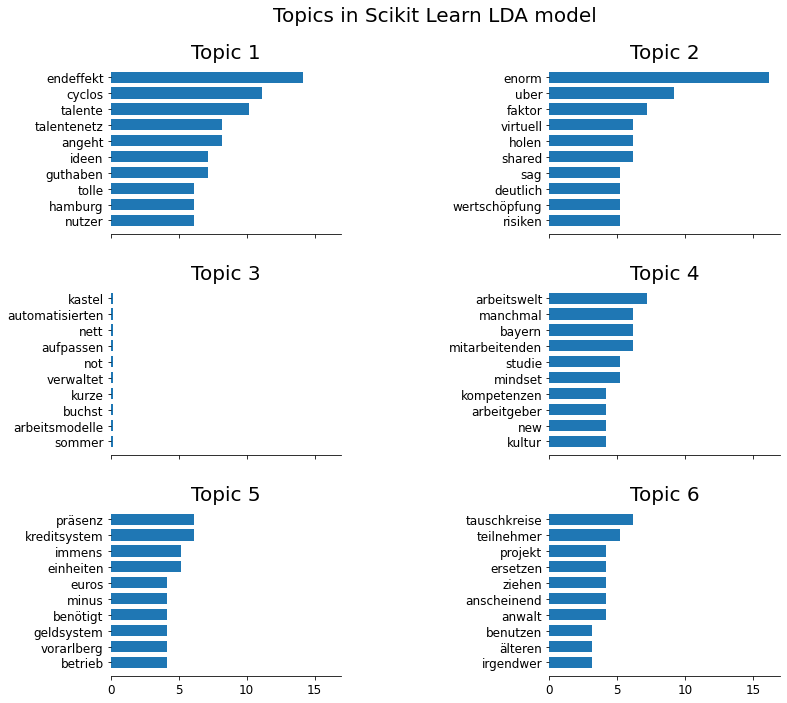

In [26]:
tf_feature_names = count.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in Scikit Learn LDA model')